In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing all necessary modules

In [46]:
Concrete_Data = pd.read_excel("Concrete_Data.xls") 
Concrete_Data.head() #Reading the excel file and displaying the first five rows of the data frame.

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [47]:
new_column_names = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", 
                    "Fine Aggregate", "Age", "Concrete Compressive Strength"] #List of simpler column names.
old_column_names = list(Concrete_Data.columns) #Original column names.
swap = {}
for i, name in enumerate(old_column_names):
    swap[name] = new_column_names[i] #The swap dictionary will map the old column names, allowing them to be replaced with the corresponding new one.
Concrete_Data = Concrete_Data.rename(columns = swap) #This completes the swap.
Concrete_Data.head() #Displays the first five rows of the data frame with the new column names.

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [49]:
Concrete_Data.isna().sum() #Checking for null values as to better understand the dataframe prior to building the model.

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete Compressive Strength    0
dtype: int64

In [50]:
Concrete_Data.describe() #Getting a general description of the dataframe.

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


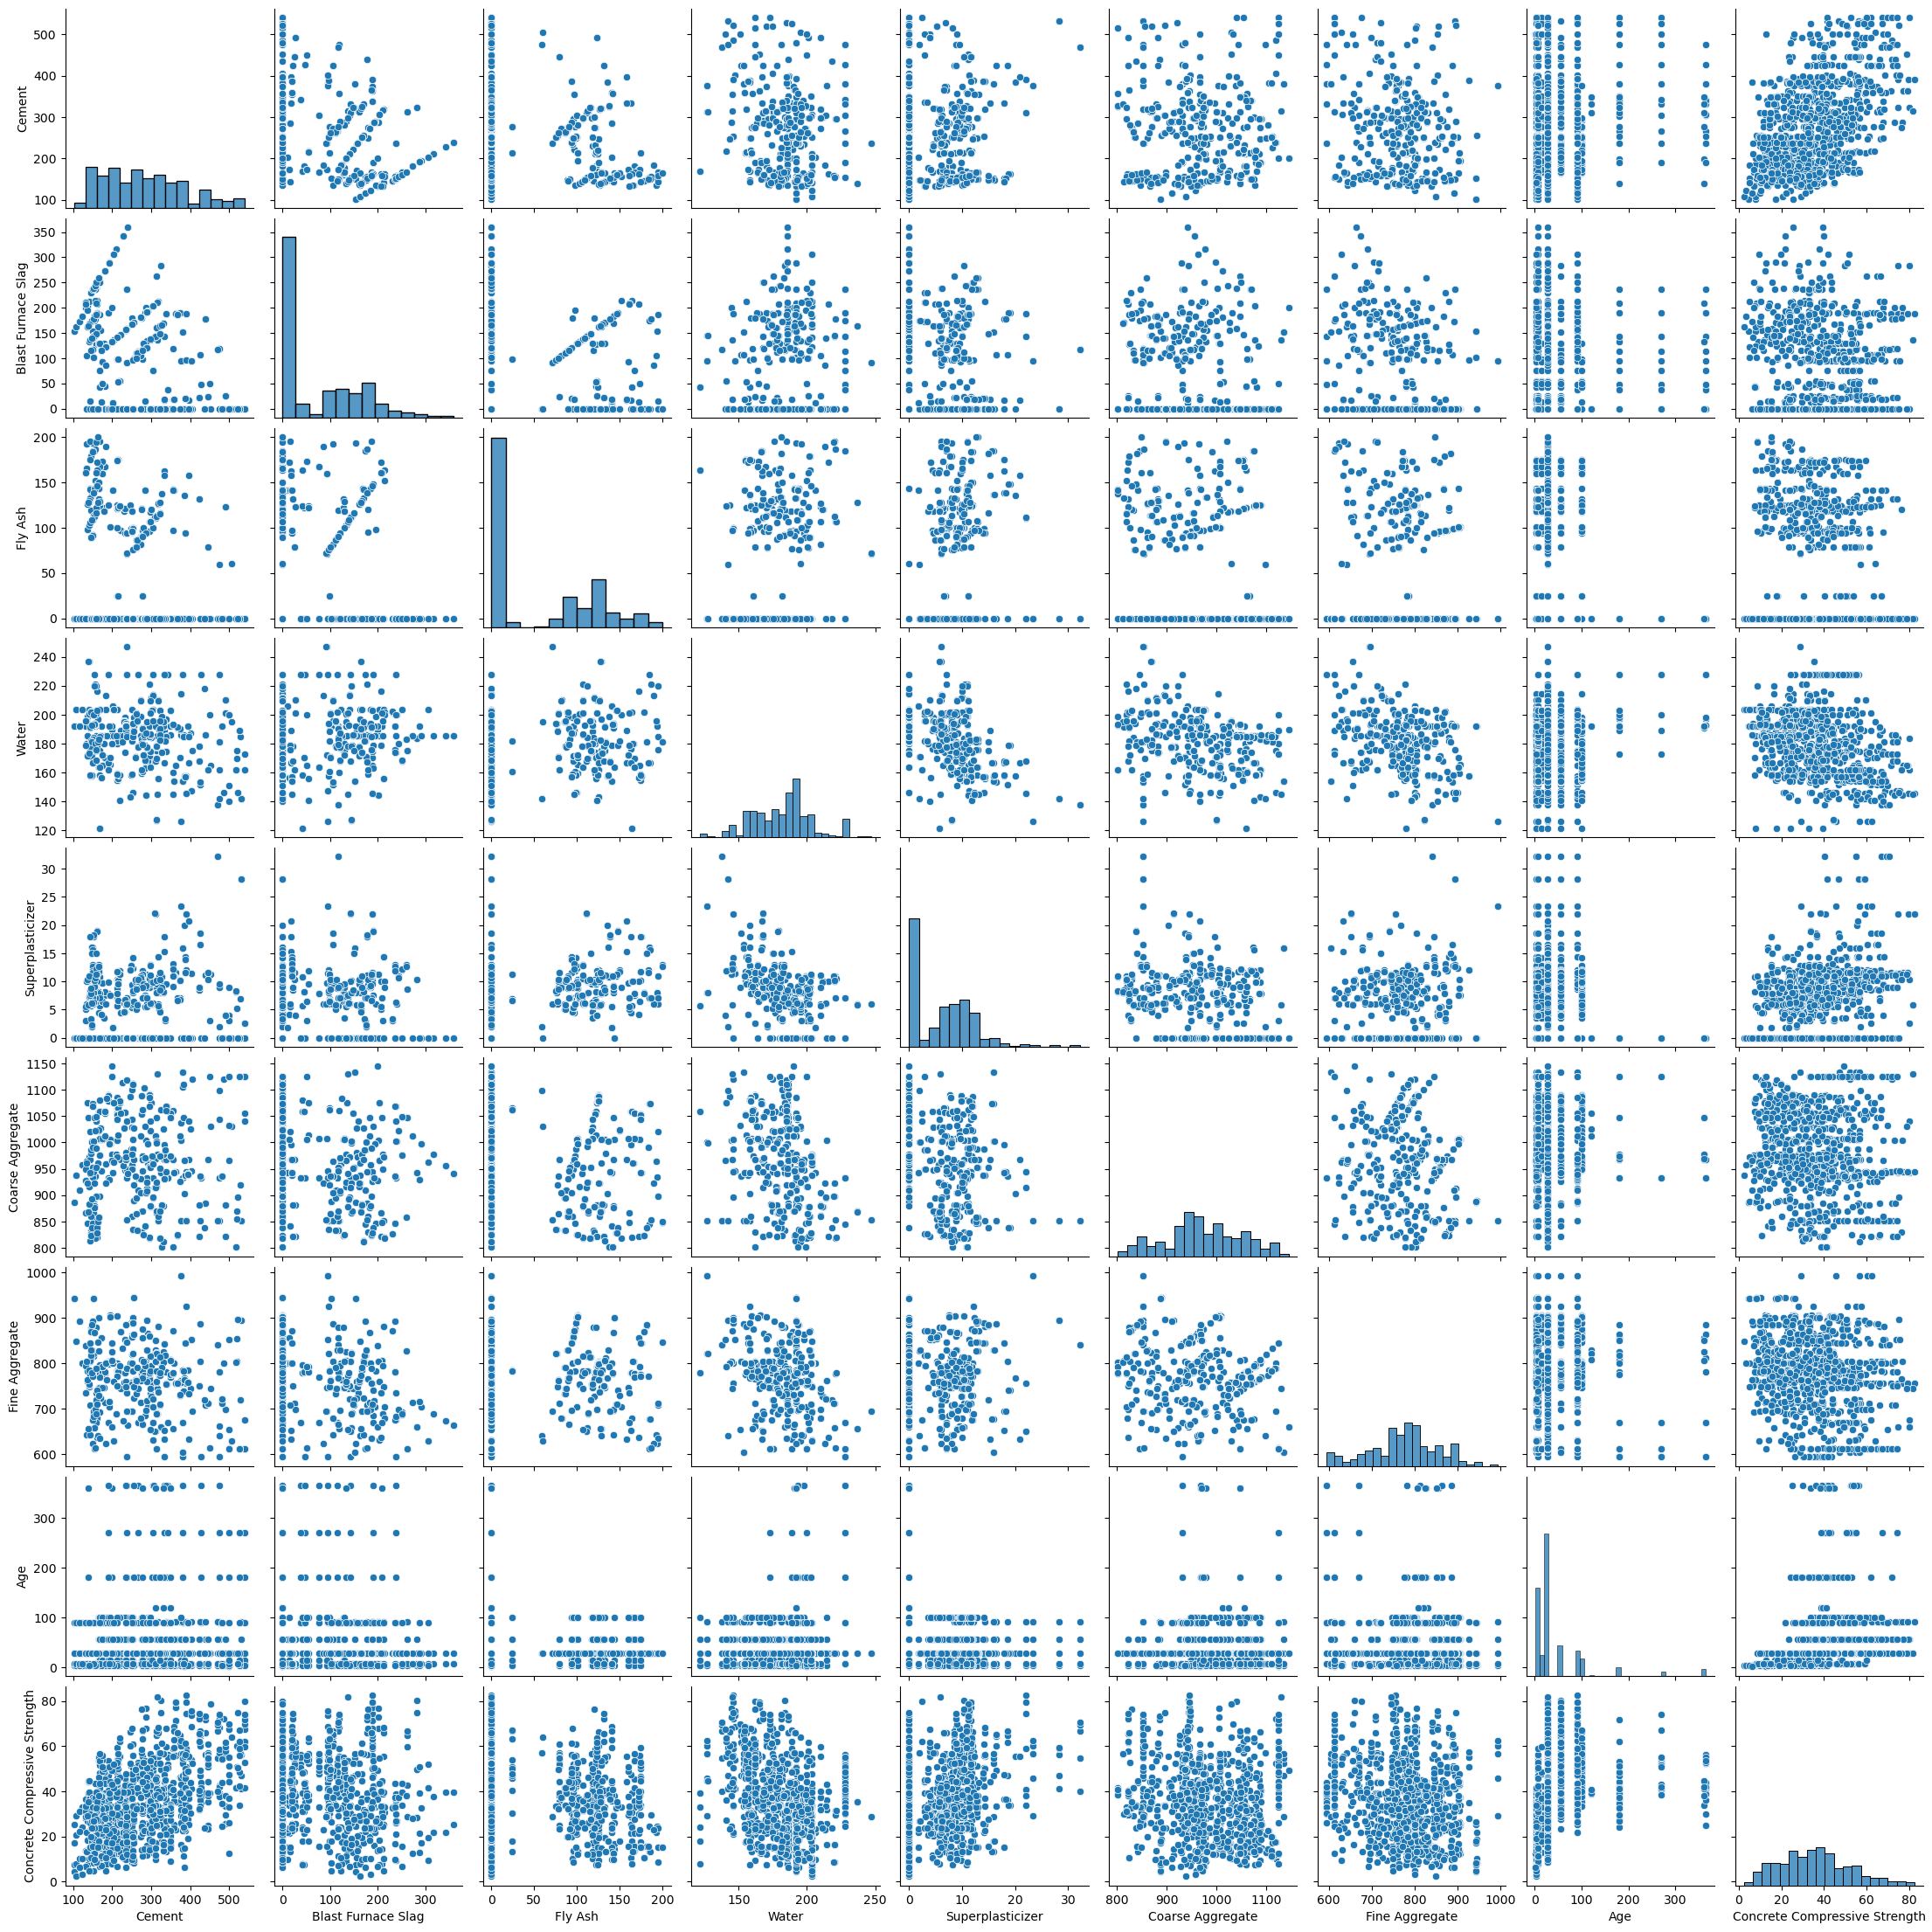

In [52]:
sns.pairplot(Concrete_Data)
plt.show() #Here we use a pairwise plot to learn more about each variable in the data frame, as well as how they relate to each other.
#From this we find that the last row is of importance because it shows the relationship of strength and all other variables.

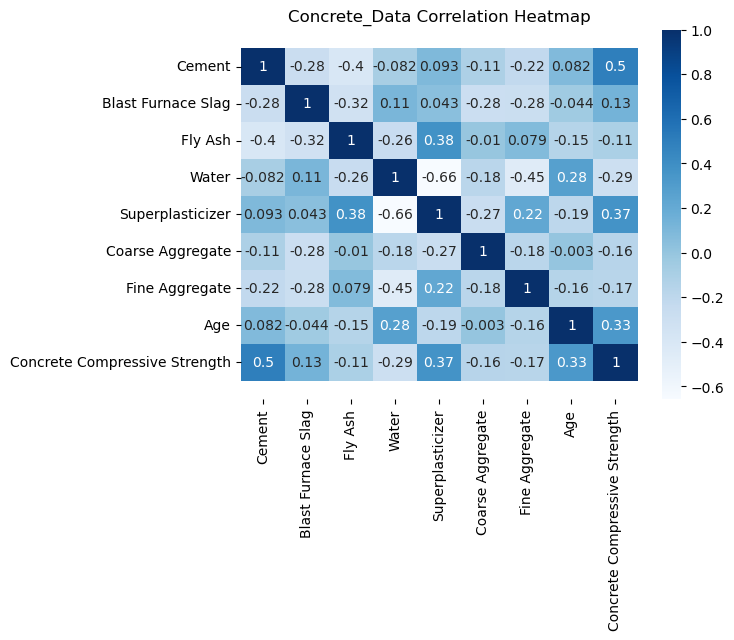

In [54]:
correlation = Concrete_Data.corr()
sns.heatmap(correlation, annot=True, cmap='Blues')
b,t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title('Concrete_Data Correlation Heatmap')
plt.show() #This creates a heatmap of each variables correlation in relation to each other
#We now have an understanding of all important high positive and negative correlations

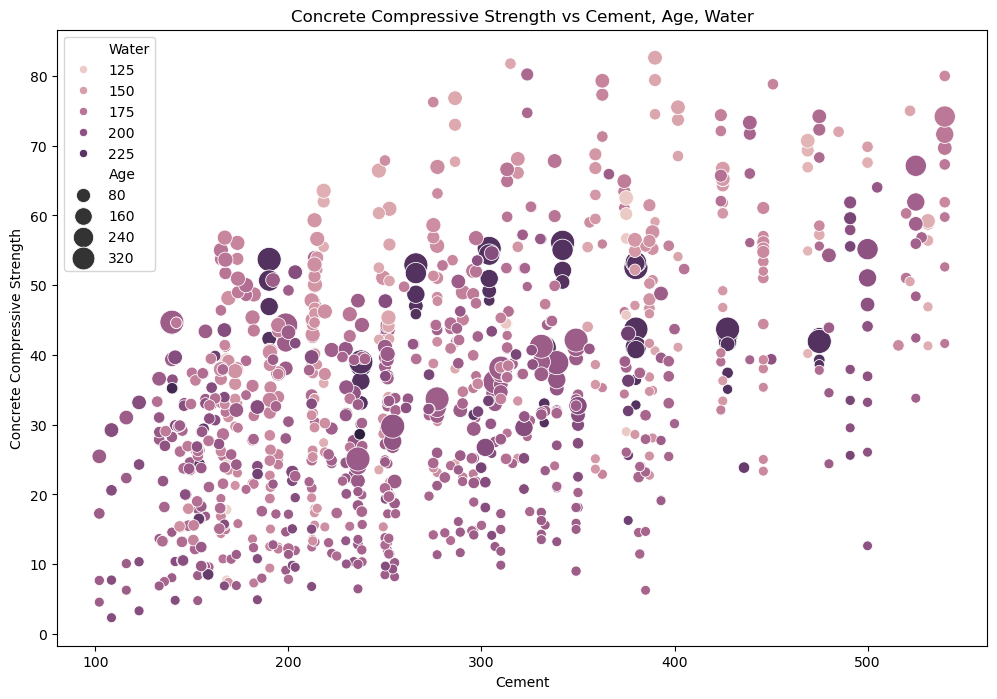

In [56]:
plt.figure(figsize = (12, 8))
CWA=sns.scatterplot(y = 'Concrete Compressive Strength', x = 'Cement', hue = 'Water', size = 'Age', data = Concrete_Data, sizes = (50, 300))
CWA.set_title("Concrete Compressive Strength vs Cement, Age, Water")
plt.show() #We created a scatterplot that will tell us the relationship between concrete compressive strength when compared to cement, age, and water

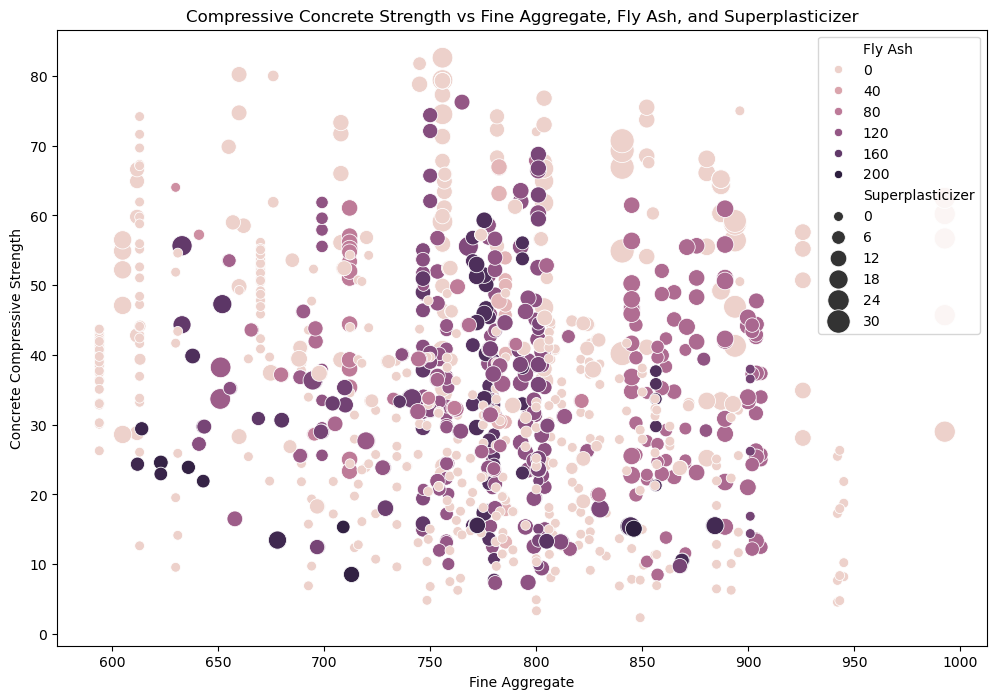

In [57]:
plt.figure(figsize = (12,8))
CFS=sns.scatterplot(y="Concrete Compressive Strength", x = "Fine Aggregate", hue="Fly Ash", size = "Superplasticizer", data = Concrete_Data, sizes = (50,300))
CFS.set_title("Compressive Concrete Strength vs Fine Aggregate, Fly Ash, and Superplasticizer")
plt.show()
CFS.legend(loc='upper left', bbox_to_anchor=(1,1)) 
#This scatterplot gives us an understanding to strength in relation to fine aggregate, fly ash, and superplasticizer

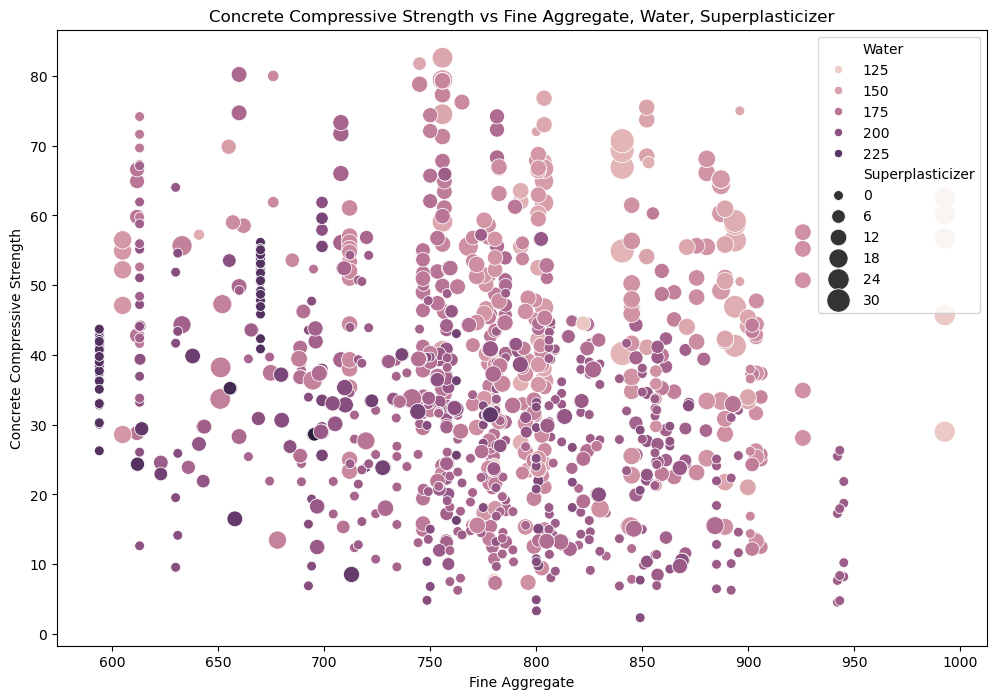

In [58]:
plt.figure(figsize = (12,8))
CSFW = sns.scatterplot(y="Concrete Compressive Strength", x = "Fine Aggregate", hue = 'Water', size = 'Superplasticizer', data = Concrete_Data, sizes = (50, 300))
CSFW.set_title("Concrete Compressive Strength vs Fine Aggregate, Water, Superplasticizer")
plt.show()
#This scatterplot gives us an understanding of strength in relation to fine aggregate, water, and superplasticizer

In [59]:
x = Concrete_Data.iloc[:,:-1] #Selects all but the last column for features
y = Concrete_Data.iloc[:,-1] #Selects the last column for the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2) #This creates testing and training variables
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
linear.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
y_pred_linear = linear.predict(x_test)
y_pred_lasso = lasso.predict(x_test) #Sets up linear, lasso, and ridge predictions
y_pred_ridge = ridge.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_linear)),mean_squared_error(y_test, y_pred_linear),
            mean_absolute_error(y_test, y_pred_linear), r2_score(y_test, y_pred_linear)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


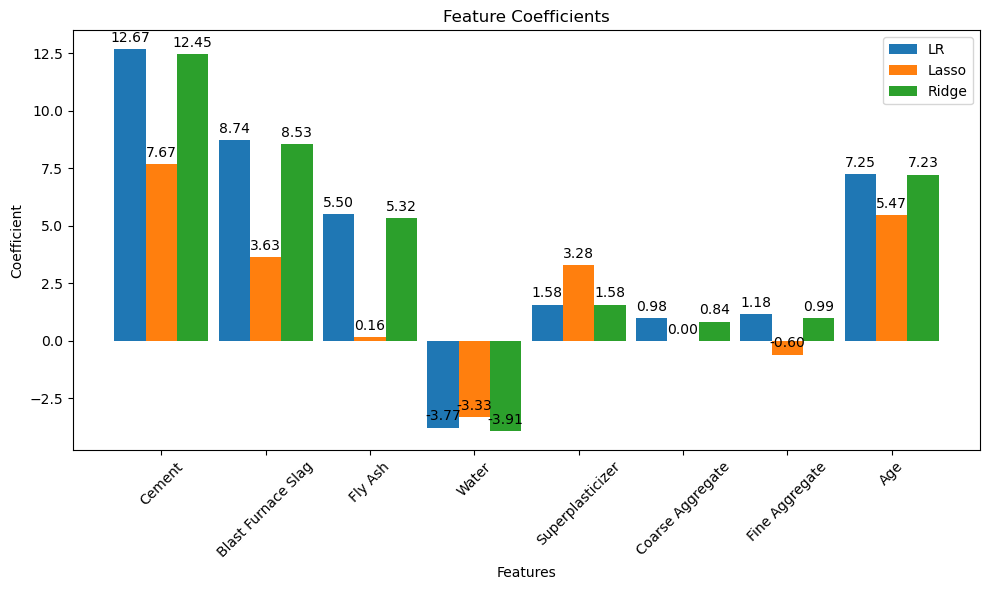

In [61]:
linearcf = linear.coef_
lassocf = lasso.coef_
ridgecf = ridge.coef_
labels = new_column_names[:-1]
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), linearcf, width, label='LR')
rects2 = ax.bar(x, lassocf, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), ridgecf, width, label='Ridge')
ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()
#Creates a bar graph of the feature coefficients

Text(0.5, 1.0, 'Linear Regressor')

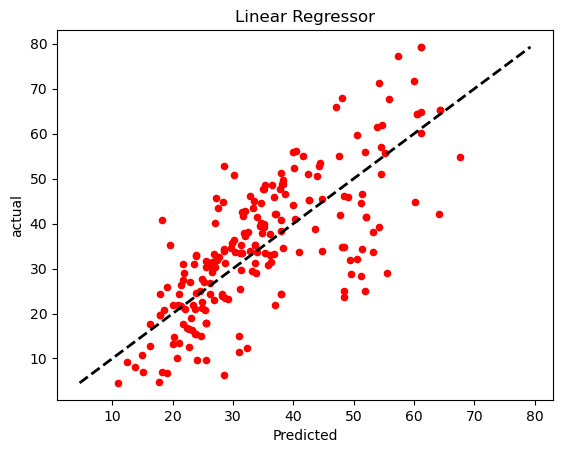

In [62]:
axl = plt.scatter(y_pred_linear, y_test, s=20, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Linear Regressor")

<function matplotlib.pyplot.show(close=None, block=None)>

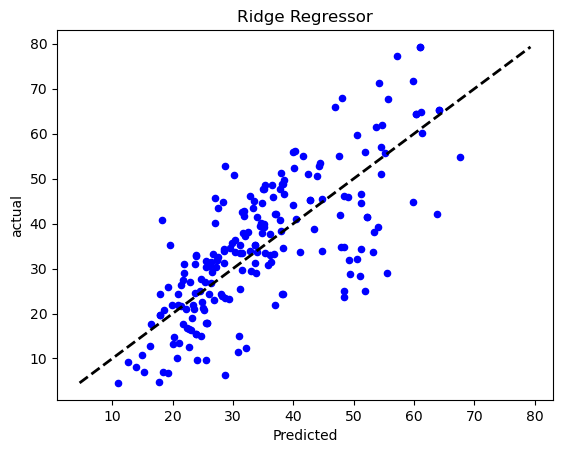

In [63]:
plt.scatter(y_pred_ridge, y_test, s=20, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Ridge Regressor")
plt.show

Text(0.5, 1.0, 'Lasso Regressor')

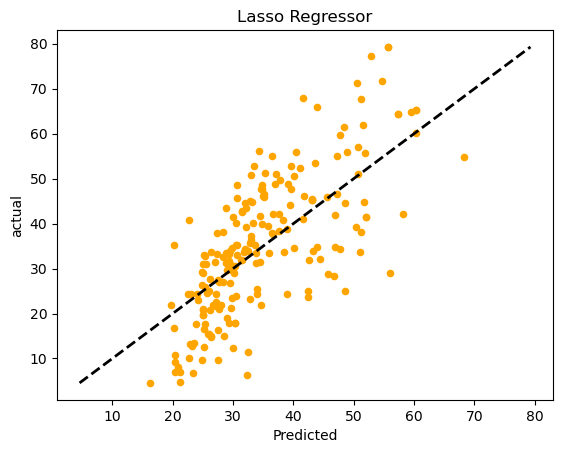

In [64]:
plt.scatter(y_pred_lasso, y_test, s=20, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Lasso Regressor")

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.41 		 54.90 		4.54 		0.78


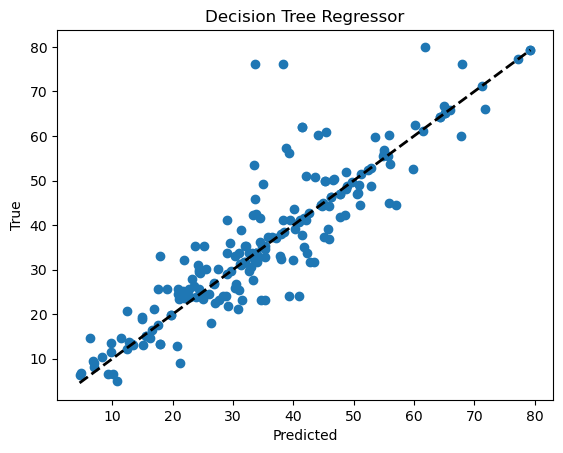

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

y_pred_dtr = dtr.predict(x_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.91 		 24.08 		3.36 		0.90


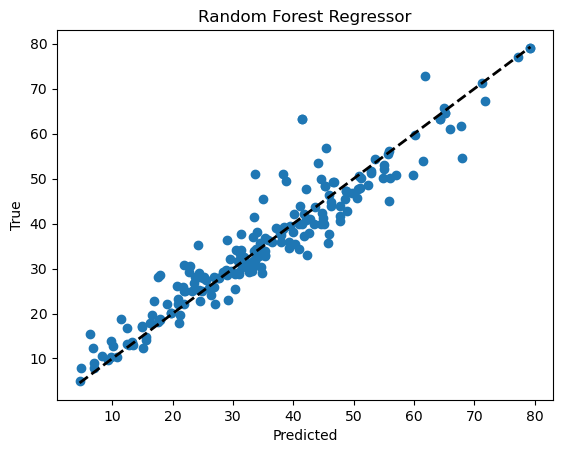

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

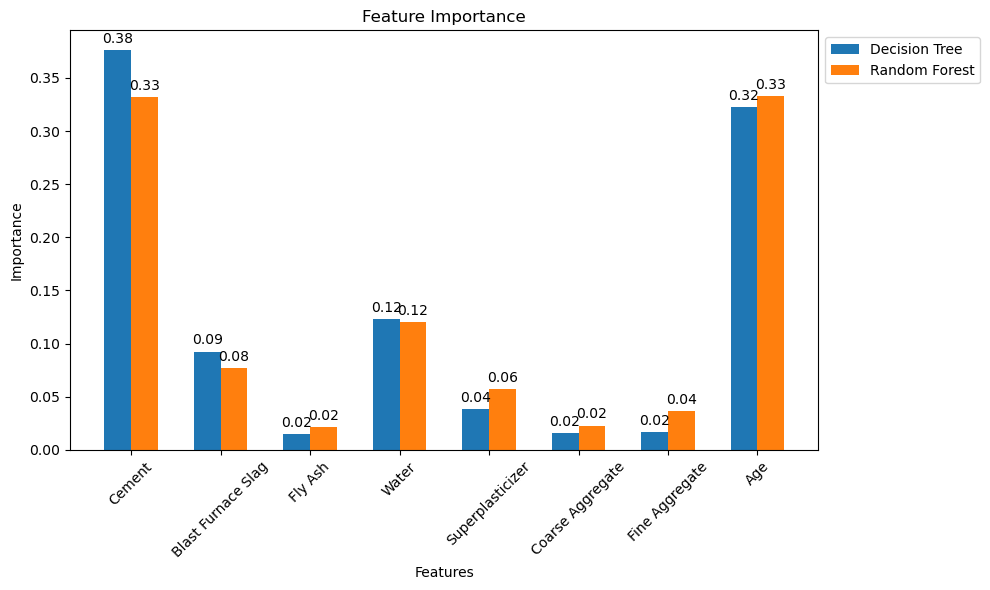

In [67]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
x = np.arange(len(labels)) 
width = 0.3
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [82]:
def predict_concrete_strength(user_inputs):
    model = rfr
    user_inputs_array = np.array(user_inputs).reshape(1, -1)
    predicted_strength = model.predict(user_inputs_array)
    return predicted_strength[0]
user_inputs = [
    float(input("Cement:")),
    float(input("Blast Furnace Slag:")),
    float(input("Fly Ash:")),
    float(input("Coarse Aggregate:")),
    float(input("Fine Aggregate:")),
    float(input("Water:")),
    float(input("Superplasticizer:")),
    float(input("Age:"))
]
predicted_value = predict_concrete_strength(user_inputs)
print("Predicted Concrete Strength:", predicted_value, 'MPa')

Cement: 1000
Blast Furnace Slag: 175
Fly Ash: 136
Coarse Aggregate: 152
Fine Aggregate: 256
Water: 4
Superplasticizer: 3
Age: 1


Predicted Concrete Strength: 60.38440362206827 MPa


In [269]:
user_inputs = [
    float(input("Cement:")),
    float(input("Blast Furnace Slag:")),
    float(input("Fly Ash:")),
    float(input("Coarse Aggregate:")),
    float(input("Fine Aggregate:")),
    float(input("Water:")),
    float(input("Superplasticizer:")),
    float(input("Age:"))
]
predicted_value = predict_concrete_strength(user_inputs)
print("Predicted Concrete Strength:", predicted_value, 'MPa')

Cement: 320
Blast Furnace Slag: 0
Fly Ash: 0
Coarse Aggregate: 970
Fine Aggregate: 850
Water: 192
Superplasticizer: 0
Age: 7


Predicted Concrete Strength: 56.86072029772001 MPa


In [271]:
user_inputs = [
    float(input("Cement:")),
    float(input("Blast Furnace Slag:")),
    float(input("Fly Ash:")),
    float(input("Coarse Aggregate:")),
    float(input("Fine Aggregate:")),
    float(input("Water:")),
    float(input("Superplasticizer:")),
    float(input("Age:"))
]
predicted_value = predict_concrete_strength(user_inputs)
print("Predicted Concrete Strength:", predicted_value, 'MPa')

Cement: 320
Blast Furnace Slag: 0
Fly Ash: 126
Coarse Aggregate: 860
Fine Aggregate: 856
Water: 209
Superplasticizer: 5.7
Age: 28


Predicted Concrete Strength: 56.74508433826651 MPa


In [275]:
user_inputs = [
    float(input("Cement:")),
    float(input("Blast Furnace Slag:")),
    float(input("Fly Ash:")),
    float(input("Coarse Aggregate:")),
    float(input("Fine Aggregate:")),
    float(input("Water:")),
    float(input("Superplasticizer:")),
    float(input("Age:"))
]
predicted_value = predict_concrete_strength(user_inputs)
print("Predicted Concrete Strength:", predicted_value, 'MPa')

Cement: 320
Blast Furnace Slag: 73
Fly Ash: 54
Coarse Aggregate: 972
Fine Aggregate: 773
Water: 181
Superplasticizer: 6
Age: 45


Predicted Concrete Strength: 63.49992503374828 MPa


In [277]:
user_inputs = [
    float(input("Cement:")),
    float(input("Blast Furnace Slag:")),
    float(input("Fly Ash:")),
    float(input("Coarse Aggregate:")),
    float(input("Fine Aggregate:")),
    float(input("Water:")),
    float(input("Superplasticizer:")),
    float(input("Age:"))
]
predicted_value = predict_concrete_strength(user_inputs)
print("Predicted Concrete Strength:", predicted_value, 'MPa')

Cement: 530
Blast Furnace Slag: 359
Fly Ash: 200
Coarse Aggregate: 1145
Fine Aggregate: 992
Water: 247
Superplasticizer: 32
Age: 365


Predicted Concrete Strength: 63.49992503374828 MPa


In [ ]:
data = pd.read_csv('Concrete_Data.csv')
new_column_names = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", 
                    "Fine Aggregate", "Age", "Concrete Compressive Strength"]
old_column_names = list(data.columns) 
swap = {}
for i, name in enumerate(old_column_names):
    swap[name] = new_column_names[i] 
data = data.rename(columns = swap) 
model = rfr
# Function to predict concrete strength
def predict_concrete_strength(user_inputs):
    user_inputs_array = np.array(user_inputs).reshape(1, -1)
    predicted_strength = rfr.predict(user_inputs_array)
    return predicted_strength[0]  
def train_model(data):
    X = data.drop(columns=['Concrete Compressive Strength'])
    y = data['Concrete Compressive Strength']
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    dump(model, 'concrete_model.joblib')
    print("Model retrained successfully.")
    return model 
# Function to add observations to the database
def add_observation(new_observation):
    global data
    data = pd.concat([data, pd.DataFrame([new_observation], columns=data.columns)], ignore_index=True)
    data.to_csv('Concrete_Data.csv', index=False)
    train_model(data)  
# User interface
while True:
    print("\nMenu:")
    print("1. Predict Concrete Strength")
    print("2. Add Observation")
    print("3. Exit")
    choice = input("Enter your choice: ")
    if choice == "1":
        user_inputs = [
            float(input("Cement: ")),
            float(input("Blast Furnace Slag: ")),
            float(input("Fly Ash: ")),
            float(input("Coarse Aggregate: ")),
            float(input("Fine Aggregate: ")),
            float(input("Water: ")),
            float(input("Superplasticizer: ")),
            float(input("Age: "))
        ]
        predicted_value = predict_concrete_strength(user_inputs)
        print("Predicted Concrete Strength:", predicted_value, "MPa")
    elif choice == "2":
        new_observation = [
            float(input("Cement: ")),
            float(input("Blast Furnace Slag: ")),
            float(input("Fly Ash: ")),
            float(input("Coarse Aggregate: ")),
            float(input("Fine Aggregate: ")),
            float(input("Water: ")),
            float(input("Superplasticizer: ")),
            float(input("Age: ")),
            float(input("Observed Strength: "))
        ]
        add_observation(new_observation)
        print("New observation added and model updated.")
    elif choice == "3":
        print("Exiting...")
        break    
    else:
        print("Invalid choice. Please try again.")


Menu:
1. Predict Concrete Strength
2. Add Observation
3. Exit


Enter your choice:  2
Cement:  172
Blast Furnace Slag:  36
Fly Ash:  2
Coarse Aggregate:  150
Fine Aggregate:  600
Water:  720
Superplasticizer:  12
Age:  3
Observed Strength:  78


Model retrained successfully.
New observation added and model updated.

Menu:
1. Predict Concrete Strength
2. Add Observation
3. Exit


Enter your choice:  1
Cement:  1
Blast Furnace Slag:  2
Fly Ash:  3
Coarse Aggregate:  4
Fine Aggregate:  5
Water:  6
Superplasticizer:  7
Age:  8


Predicted Concrete Strength: 63.899461601242905 MPa

Menu:
1. Predict Concrete Strength
2. Add Observation
3. Exit
